Figure 1  

Overlays of heatmaps for left and right blind spots for all participants

In [2]:
# Imports
import os

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# data handling
import pandas as pd
import numpy as np

In [3]:
plotDir = '../plots'
# print(plotDir)

In [4]:
df = pd.read_csv('BS_table.csv')
# only keep rows with 'SV' in 'Var1'
df = df[df['Var1'].str.contains('SV')]

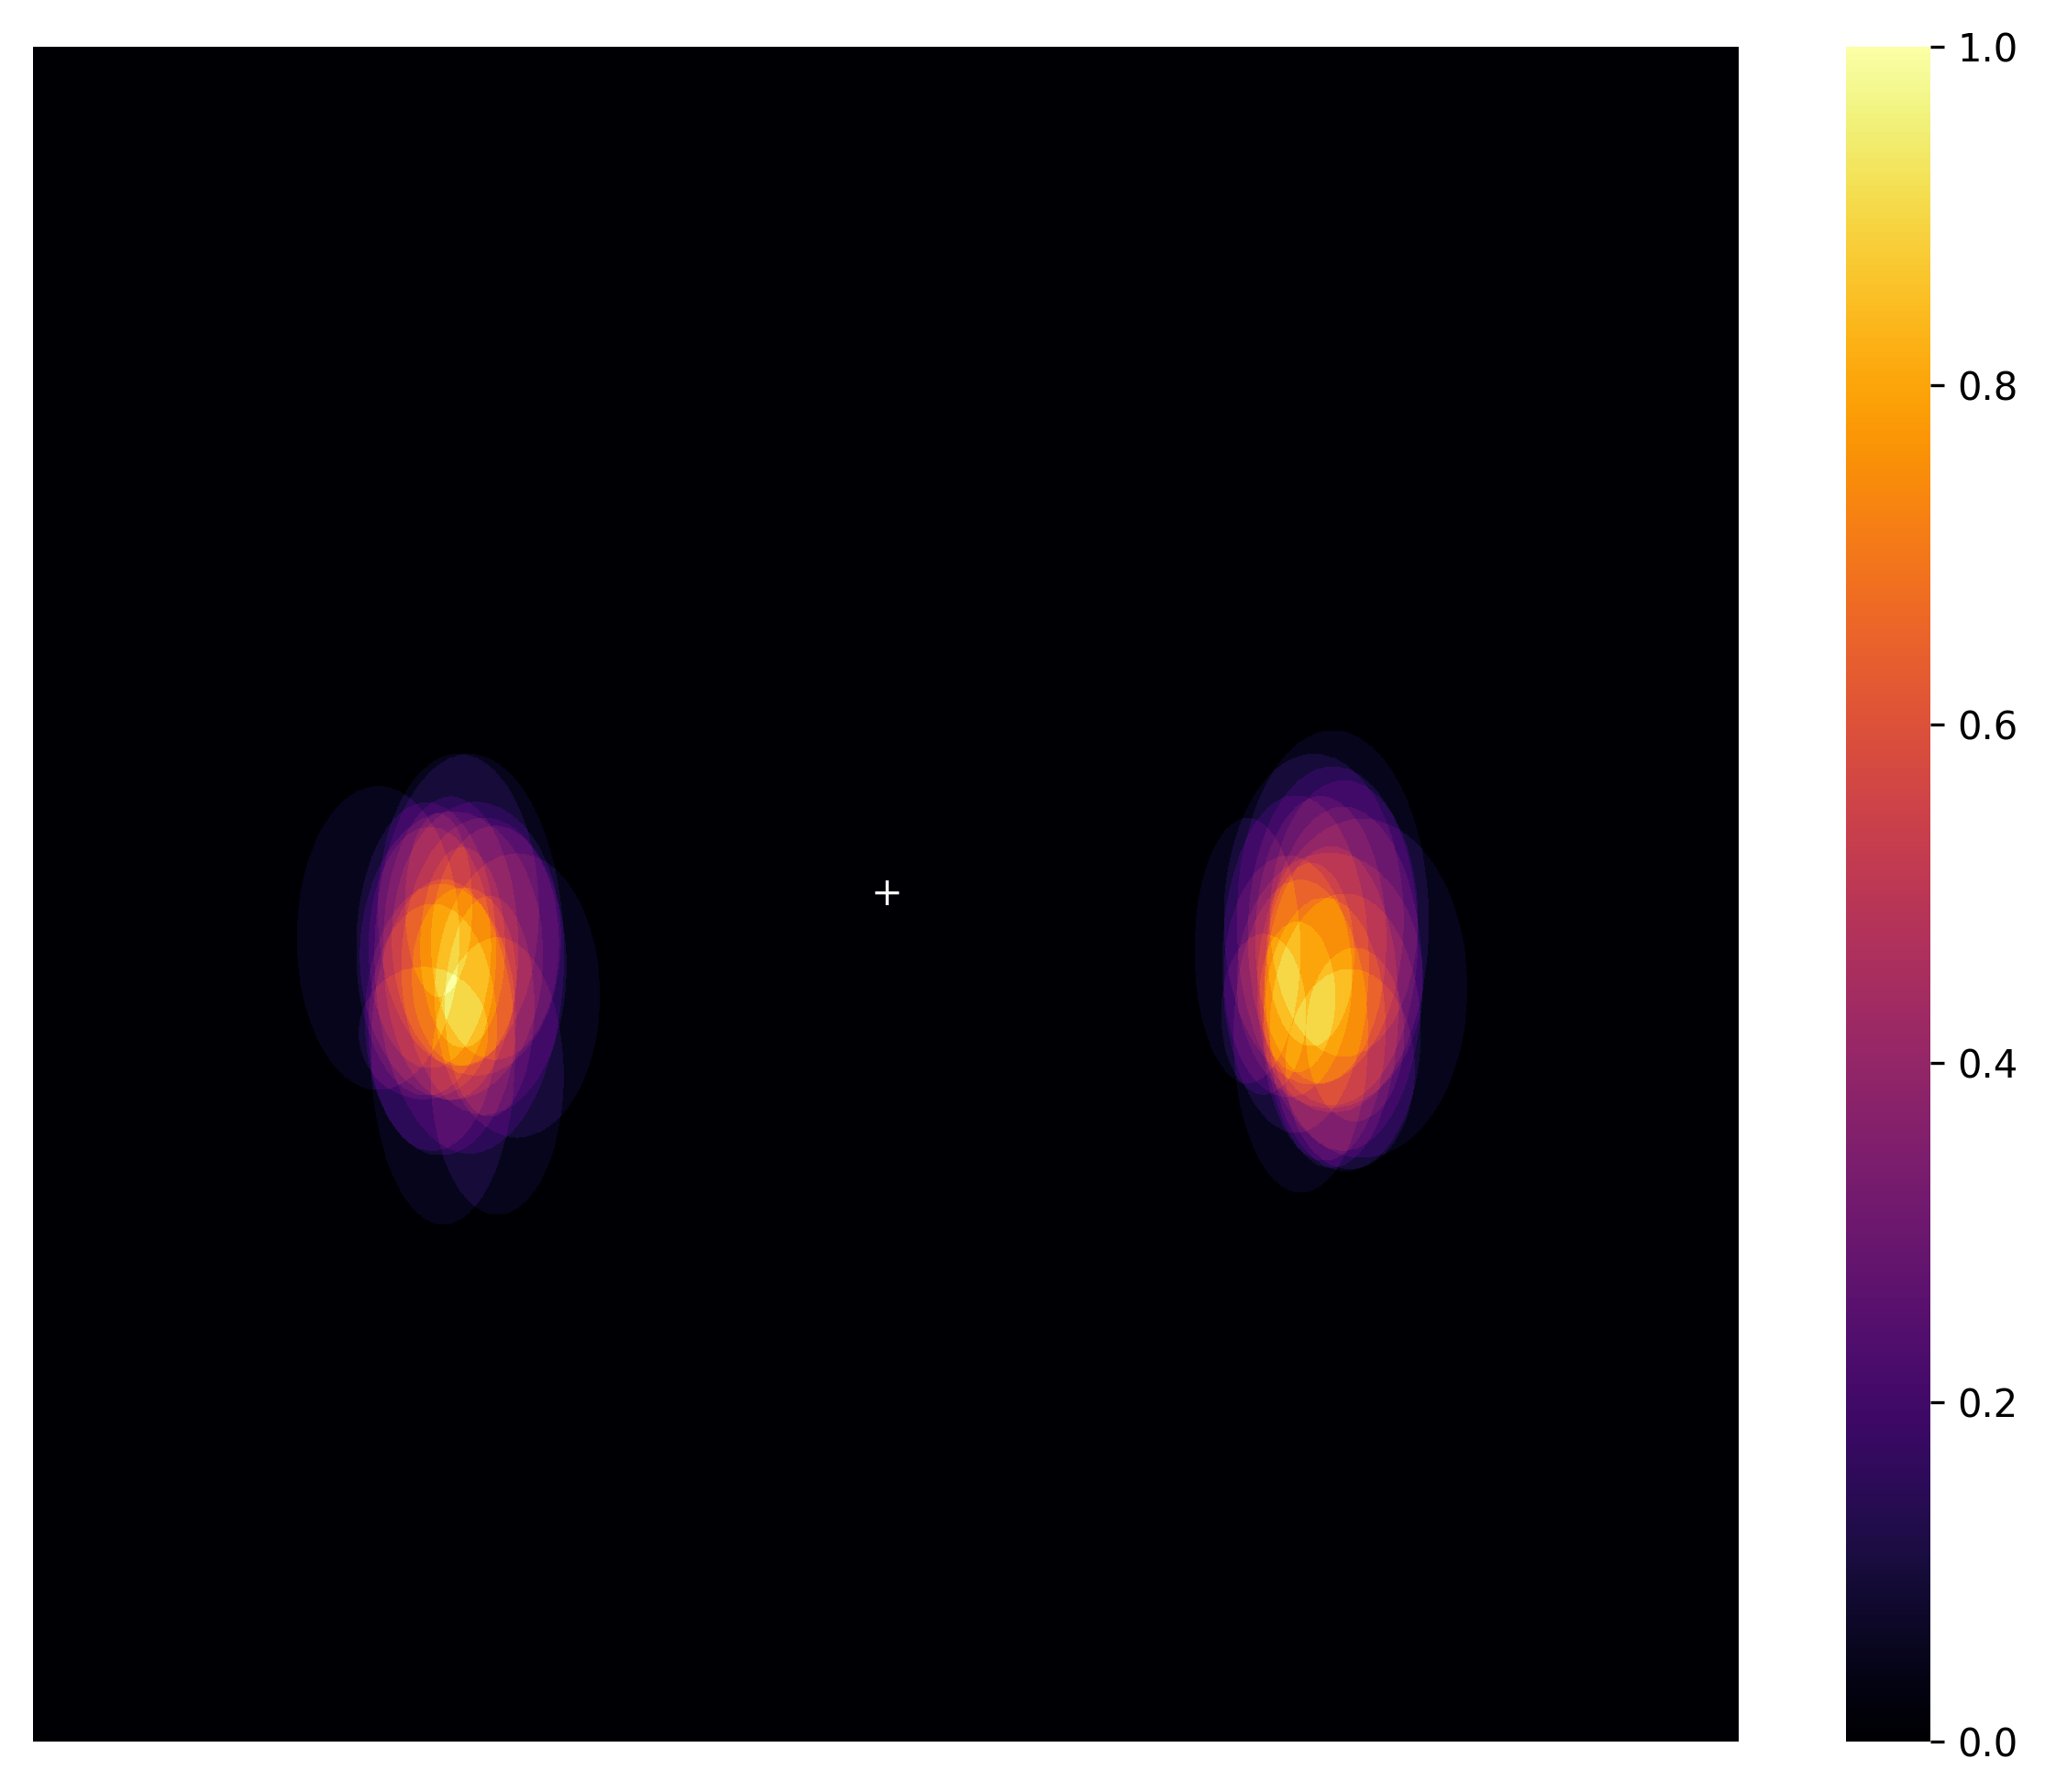

In [ ]:
def create_blind_spot_heatmap(df, monitor_x_pixels=3840, monitor_y_pixels=2160):
    heatmap_grid = np.zeros((monitor_y_pixels, monitor_x_pixels))
    
    y_coords, x_coords = np.indices(heatmap_grid.shape)
    
    for _, row in df.iterrows():
        center_x_left = round(monitor_x_pixels // 2 - row['x_center'])
        center_y_left = round(monitor_y_pixels // 2 + row['y_center'])
        
        left_ellipse = ((x_coords - center_x_left)**2 / (row['width_pix'] / 2)**2 + 
                       (y_coords - center_y_left)**2 / (row['height_pix'] / 2)**2) <= 1
        
        center_x_right = round(monitor_x_pixels // 2 + row['Right_x_center'])
        center_y_right = round(monitor_y_pixels // 2 + row['Right_y_center'])
        
        right_ellipse = ((x_coords - center_x_right)**2 / (row['Right_width_pix'] / 2)**2 + 
                         (y_coords - center_y_right)**2 / (row['Right_height_pix'] / 2)**2) <= 1
        
        heatmap_grid += left_ellipse.astype(int) + right_ellipse.astype(int)
    
    return heatmap_grid

heatmap_grid = create_blind_spot_heatmap(df)

# normalize
heatmap_grid = heatmap_grid / heatmap_grid.max()

annot = np.full(heatmap_grid.shape, ' ')
center_y, center_x = heatmap_grid.shape[0] // 2, heatmap_grid.shape[1] // 2
annot[center_y, center_x] = '+'

plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(heatmap_grid, cmap='inferno', annot=annot, fmt='s', cbar=True)

plt.xticks([])
plt.yticks([])
plt.savefig(os.path.join(plotDir, 'blind_spot_heatmap.png'))
plt.show()

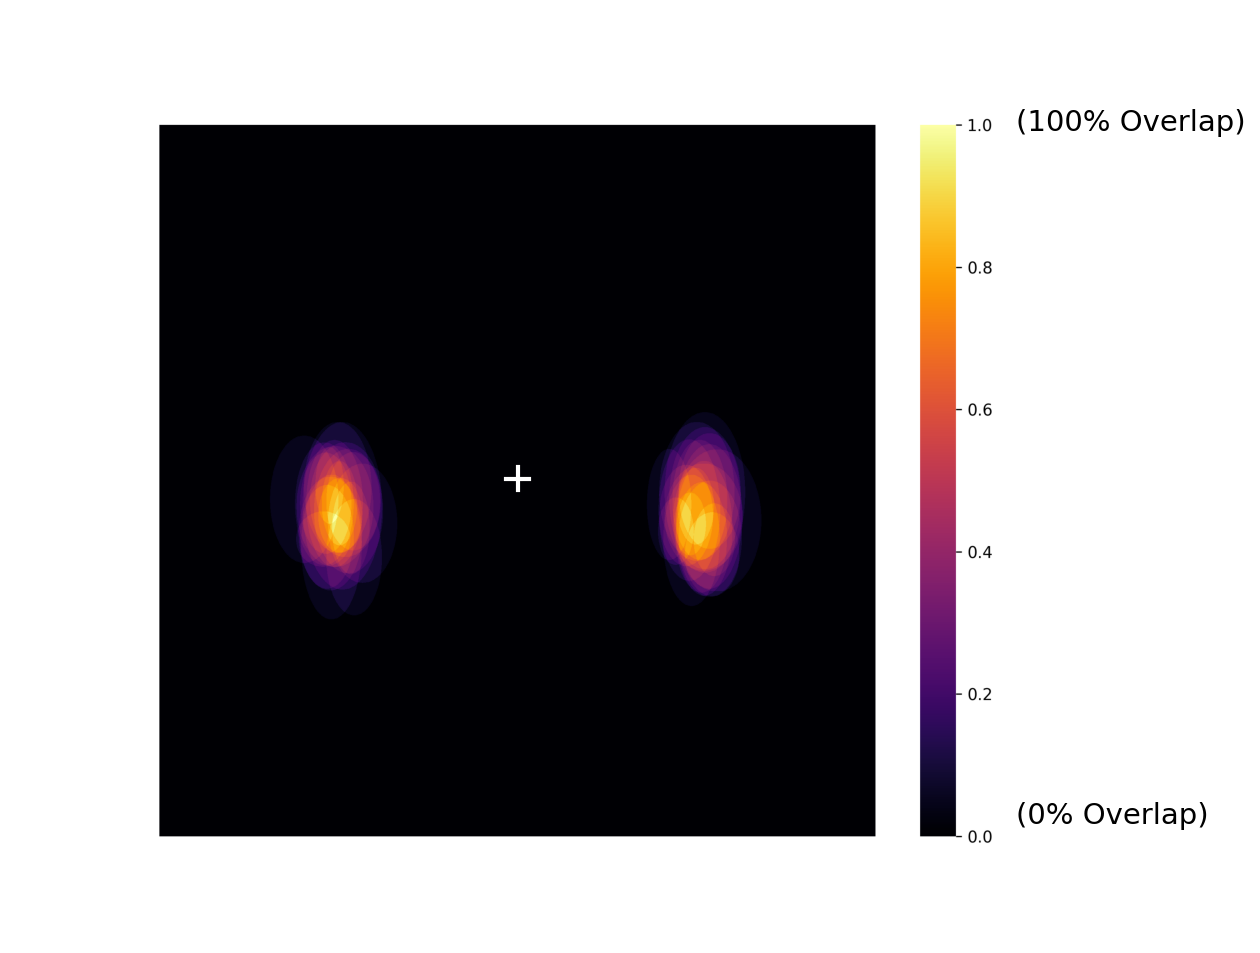

In [11]:
heat_map_png = Image.open('../plots/blind_spot_heatmap.png')
fig = plt.figure(figsize=(12, 8), dpi=150)
plt.imshow(heat_map_png)
plt.axis('off')

x_offset, y_offset = -195, 7
cross_size = 30
lw = 2
cross_x, cross_y = heat_map_png.size[0] / 2 + x_offset , heat_map_png.size[1] / 2 + y_offset # Center position

plt.plot([cross_x - cross_size, cross_x + cross_size], [cross_y, cross_y], color='white', lw=lw)  # Horizontal line
plt.plot([cross_x, cross_x], [cross_y - cross_size, cross_y + cross_size], color='white', lw=lw)  # Vertical line
plt.text(heat_map_png.size[0]-400, 300, '(100% Overlap)', color='black', fontsize=14)
plt.text(heat_map_png.size[0]-400, heat_map_png.size[1]-300, '(0% Overlap)', color='black', fontsize=14)
plt.savefig("../plots/heatmap.png")
plt.show()
